# New York City Airbnb

# Introduction



In this document, I will be exploring the 2019 New York City Airbnb dataset that can be found [here](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). The dataset containing information about hosts, geographical availability and necessary metrics to make predictions and draw conclusions.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time
import math
import datetime
%matplotlib inline

def darkgrid():
    sns.set_style('darkgrid')
    
def dark():
    sns.set_style('dark')

# set theme
darkgrid()
# set base colour
base_colour = sns.color_palette()[0]

In [2]:
airbnb_df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

This dataset contains 48,895 rows and 15 columns. Most rows have complete data, there are a few entries with missing data however, the columns containing missing data are `name`, `host_name`, `last_review` and `reviews_per_month`.

In [5]:
airbnb_df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [6]:
airbnb_df.loc[airbnb_df['host_id']==2787]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
10372,7937553,Riomaggiore Room. Queen Bedroom in Bklyn Townh...,2787,John,Brooklyn,Bensonhurst,40.60951,-73.97622,Private room,99,1,21,2018-10-27,0.50,6,153
13583,10160215,Torre del Lago Room.,2787,John,Brooklyn,Gravesend,40.60755,-73.97410,Private room,79,1,17,2019-06-26,0.40,6,174
13688,10267242,Cinque Terre Room. Clean and Quiet Queen Bedroom,2787,John,Brooklyn,Gravesend,40.60810,-73.97541,Private room,149,1,24,2019-05-11,0.64,6,180
13963,10593675,"La Spezia room. Clean, quiet and comfortable bed",2787,John,Brooklyn,Bensonhurst,40.60951,-73.97642,Shared room,79,1,15,2018-09-29,0.43,6,180
21556,17263207,Brooklyn home. Comfort and clean. Liguria room.,2787,John,Brooklyn,Bensonhurst,40.60877,-73.97382,Private room,49,1,19,2019-06-08,0.70,6,360


### Data Cleaning

In [7]:
airbnb = airbnb_df.copy()

In [8]:
# drop columns not required: name, host_name

#airbnb = airbnb.drop()

### Data analysis


In [9]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [10]:
#nights = airbnb.minimum_nights.value_counts().reset_index.sort_values()
nights = airbnb.minimum_nights.value_counts()
nights

1       12720
2       11696
3        7999
30       3760
4        3303
        ...  
42          1
186         1
265         1
1000        1
364         1
Name: minimum_nights, Length: 109, dtype: int64

In [11]:
nights = airbnb[airbnb.minimum_nights<=30]

### What is the distribution of the minimum number of nights for each airbnb listing?

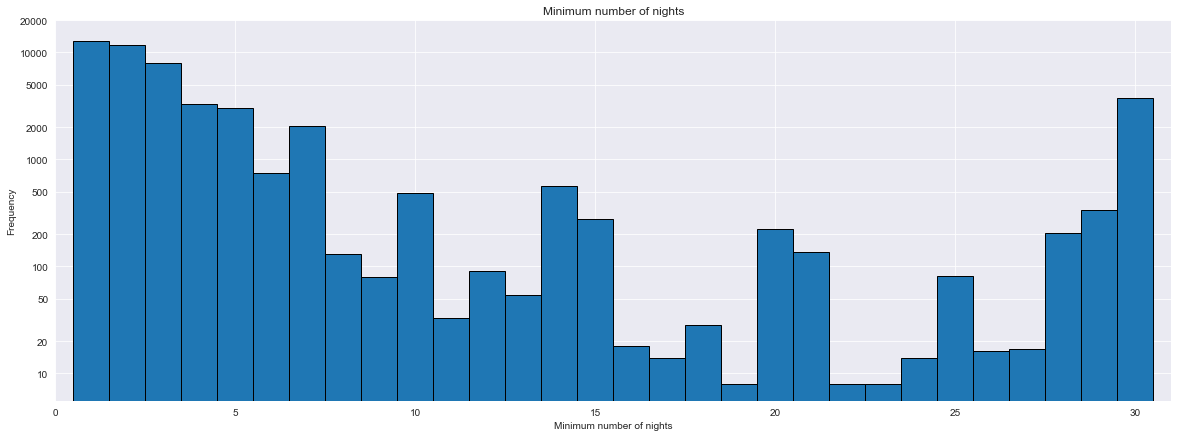

In [12]:
# set threshold for minimum number of nights
plt.figure(figsize=(20,7))

threshold = 30

# set bin size
bins = np.arange(0,threshold+1,1)
nights = airbnb[airbnb.minimum_nights<=threshold]

# plot graph
plt.hist(data=nights,x='minimum_nights',bins=bins+.5,ec='Black')
plt.yscale('log')
y_ticks = [10,20,50,100,200,500,1000,2000,5000,10000,20000]
y_labels = ['{}'.format(v) for v in y_ticks]

plt.yticks(y_ticks,y_labels)
# add labels
plt.xlim(0,threshold+1)
plt.xlabel('Minimum number of nights')
plt.ylabel('Frequency')
plt.title('Minimum number of nights');

When comparing the distribution of the minimum number of nights required to make a booking with each of the different airbnb hosts, most had a minimum of one. I decided to take the log of the y scale in order to improve the visibility of the lower frequencies. When hosts set a higher minimum number of nights, there are certain numbers that are more favourable. These include 7 nights for a full week; 10 days; 14 days for two weeks; 20 days; 21 days for 3 weeks or 30 days. There are very few hosts that will set a minimum between these thresholds. The majority of hosts however have set a minimum of one week or less.

### What is the distribution of airbnb listings by neighbourhood group?

In [13]:
# value counts on bars
def count(df,col):
    count = df[col].value_counts()
    for i in range (count.shape[0]):
        values = count[i]
        plt.text(i,values,values,ha='center',va='bottom',color='black',size=12)
    plt.yticks([]) #remove yticks;

In [14]:
def bar(df,col):
    #data setup
    freq = df[col].value_counts()
    order = freq.index
    
    plt.figure(figsize=(20,7))
    base_colour = sns.color_palette()[0]
    
    #plot graph
    sns.countplot(data=df,x=col,order=order,color=base_colour)
    
def labels(title_name, x, y):
    plt.title(title_name)
    plt.xlabel(x)
    plt.ylabel(y)

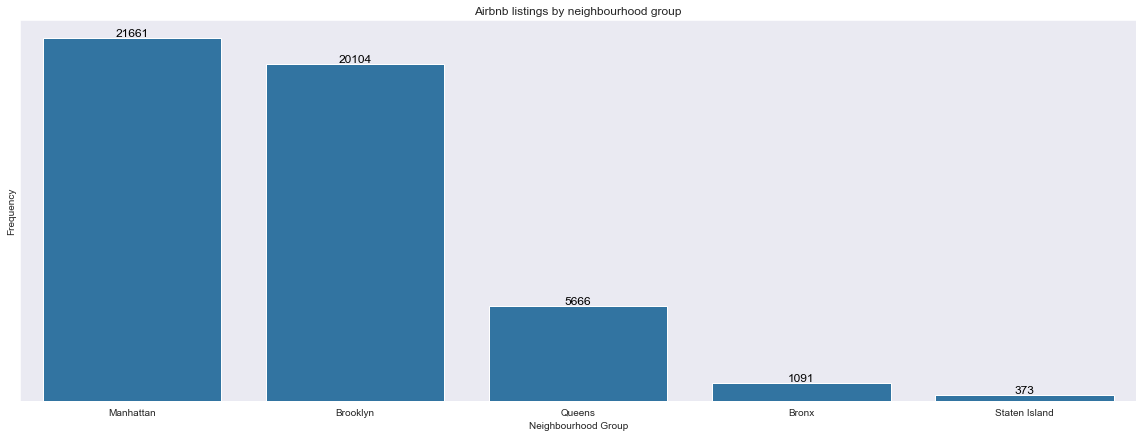

In [15]:
bar(airbnb,'neighbourhood_group')
labels('Airbnb listings by neighbourhood group','Neighbourhood Group', 'Frequency')
count(airbnb,'neighbourhood_group')

### What is the distribution of the different room types?

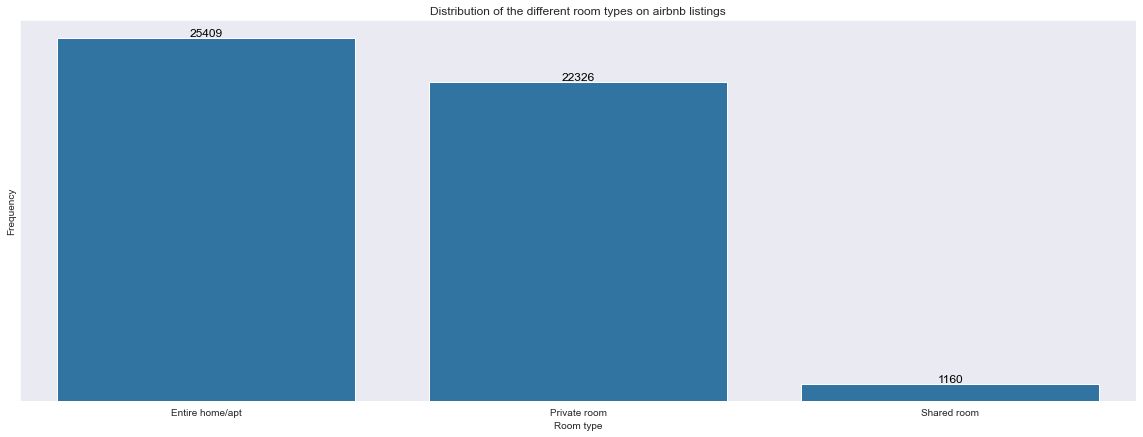

In [16]:
bar(airbnb,'room_type')
labels('Distribution of the different room types on airbnb listings','Room type','Frequency')
count(airbnb,'room_type')

The most common room type listed on airbnb is to have the entire home or apartment to yourself. There were over 25,000 listings in New York for these whilst it was closely followed by a private room at 22,326. The least common room type was to have a shared room, there were only 1,160 of these type of listings.

In [17]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### What are the availability of the listings throughout the year?

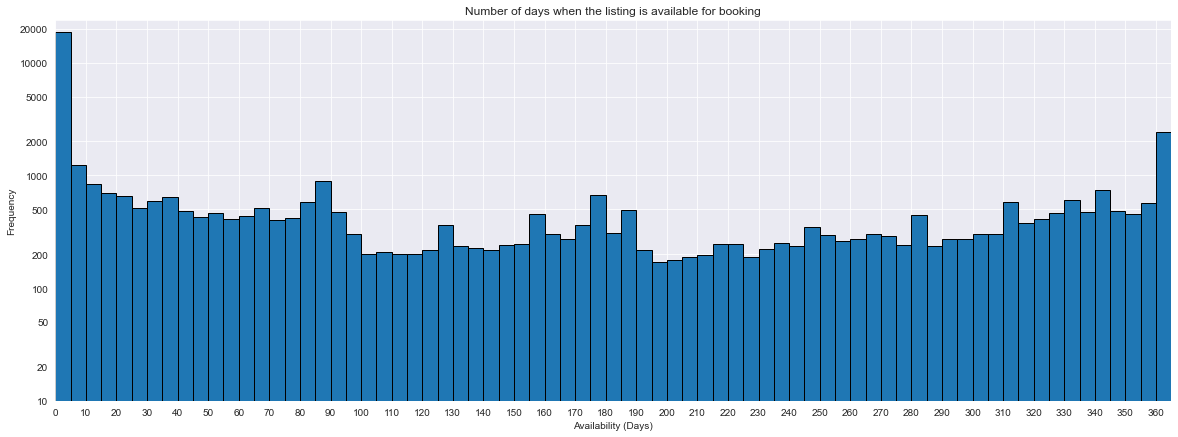

In [18]:
plt.figure(figsize=(20,7))

#plot
bins = np.arange(0,365+5,5)
plt.hist(data=airbnb,x='availability_365',bins=bins,ec='black')

# plot labels and axis
plt.yscale('log')
y_ticks = [10,20,50,100,200,500,1000,2000,5000,10000,20000]
y_labels = ['{}'.format(v) for v in y_ticks]

x_tick_loc = np.arange(0,365+10,10)
plt.xticks(x_tick_loc)
plt.xlim(0,365)
plt.yticks(y_ticks,y_labels)

plt.xlabel('Availability (Days)')
plt.ylabel('Frequency')
plt.title('Number of days when the listing is available for booking');

This shows that the availability of the listings is highly variable. There is a much larger peak at 0 days and also 365 days however showing some are available all year round whilst some may not be available at all.

### What is the distribution of the price of each listing?

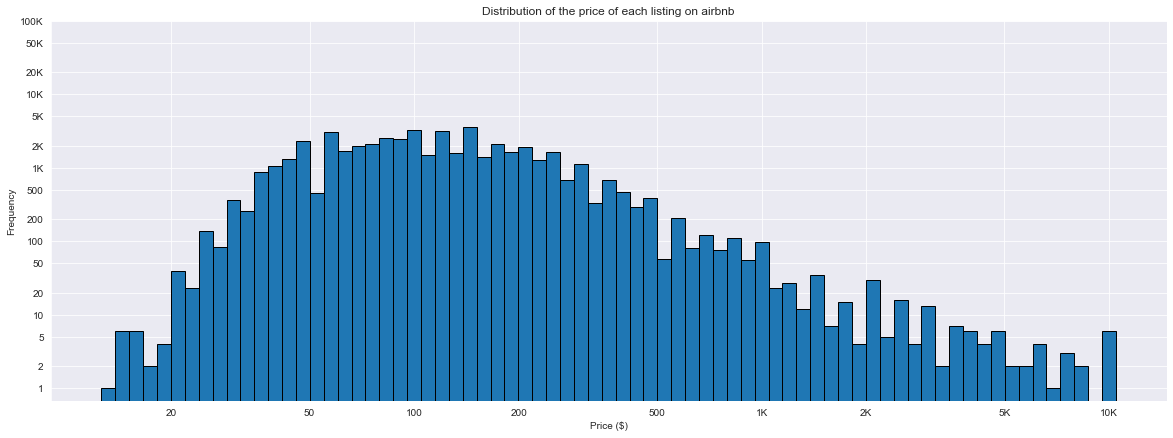

In [19]:
plt.figure(figsize=(20,7))

bins = 10**np.arange(1.1,4+0.04,0.04)
plt.hist(data=airbnb,x='price',bins=bins, ec='black')
plt.xscale('log')
plt.yscale('log')

y_ticks = [1,2,5,10,20,50,100,200,500,1e3,2e3,5e3,1e4,2e4,5e4,1e5]
y_labels = [1,2,5,10,20,50,100, 200, 500, '1K','2K','5K','10K','20K','50K','100K']
plt.ylabel('Frequency')
plt.yticks(y_ticks,y_labels)

x_ticks = [20,50,100,200,500,1e3,2e3,5e3,1e4]
x_labels =[20,50,100,200,500,'1K','2K','5K','10K']
plt.xticks(x_ticks,x_labels)
plt.title('Distribution of the price of each listing on airbnb')
plt.xlabel('Price ($)');

When the price of each listing is plotted onto a log scale, the price has a right skewed distribution. The average price is around \\$100 a night with the lowest price at \\$10 and the highest at \\$10K.

### What are the top 10 most expensive and top 10 cheapest listings?

In [20]:
# data setup
listings = airbnb[airbnb['price']>0] # exclude listings with no price
price_group = listings.groupby('price',as_index=False).count() # count number of listings at each price
top_price = price_group.price.sort_values(ascending=False) # sort by price
thres = 10

# set threshold
highest_price = top_price.index[:thres]
lowest_price = top_price.index[-thres:]

# create sub dataframe
expensive_sub = price_group.loc[highest_price]
cheapest_sub = price_group.loc[lowest_price]

In [21]:
def count_values_rev(df,col):
    count = df[col].values[::-1] #reverse array and list values in order
    for i in range (count.shape[0]):
        values = count[i]
        plt.text(i,values,values,ha='center',va='bottom',color='black',size=12)
    plt.yticks([])#remove yticks;

def count_values(df,col):
    count = df[col].values #list values in order
    for i in range (count.shape[0]):
        values = count[i]
        plt.text(i,values,values,ha='center',va='bottom',color='black',size=12)
    plt.yticks([])#remove yticks;

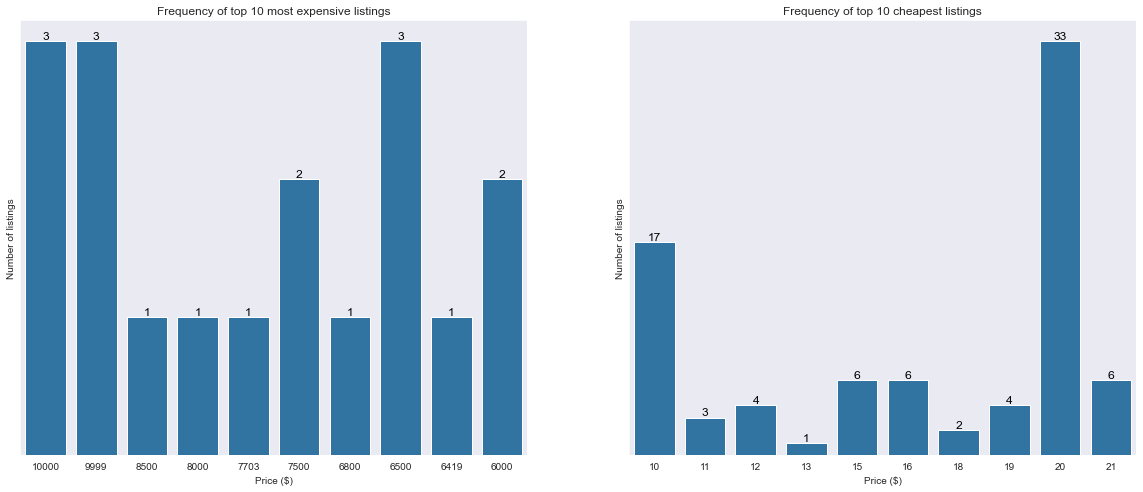

In [22]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
order = expensive_sub['price'].values # sort by most expensive
sns.barplot(data=expensive_sub,x='price',y='name',color=base_colour,order=order)
labels('Frequency of top 10 most expensive listings','Price ($)','Number of listings')
count_values(expensive_sub,'name')

plt.subplot(1,2,2)
sns.barplot(data=cheapest_sub,x='price',y='name',color=base_colour)
labels('Frequency of top 10 cheapest listings','Price ($)','Number of listings')
count_values_rev(cheapest_sub,'name');

When comparing the top 10 price listings on airbnb for New York, the most expensive price was \\$10K a night, there were a total of 3 listings at this price. There were also 3 listings that had a price of \\$9,999, slightly cheaper. There are a fair amount of expensive options for places to stay at in New York.

When comparing the 10 cheapest priced listings, there were 17 listings at \\$10 a night. There were also 33 listings at \\$20. 

This shows that if you wanted a cheap stay in New York, there are options around \\$20 a night. If you wanted an expensive stay, there are a few options above \\$6,000 a night, all the way up to \\$10,000 a night.

### What are the top 10 busiest hosts?

In [23]:
# data setup
top_hosts = airbnb.host_id.value_counts().head(10)
host_order = top_hosts.index

In [24]:
# list host_id and number of listings
top_hosts

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [25]:
# top 10 hosts listings
top_hosts_sub = airbnb.loc[airbnb['host_id'].isin(host_order)]

In [26]:
name_order = top_hosts_sub.host_name.value_counts()
name_order

Sonder (NYC)         327
Blueground           232
Kara                 121
Kazuya               103
Sonder                96
Jeremy & Laura        96
Corporate Housing     91
Ken                   87
Pranjal               65
Vida                  52
Name: host_name, dtype: int64

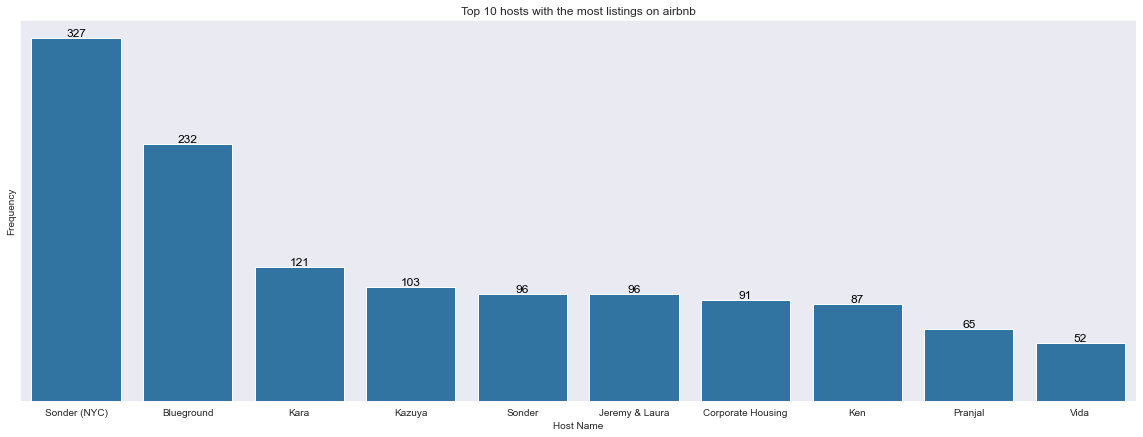

In [27]:
plt.figure(figsize=(20,7))

# bar order
host_order = top_hosts_sub['host_name'].value_counts().index
base_colour = sns.color_palette()[0]
# plot graph
sns.countplot(data=top_hosts_sub,x='host_name',order=host_order,color=base_colour)

# labels
plt.title('Top 10 hosts with the most listings on airbnb')
plt.xlabel('Host Name')
plt.ylabel('Frequency')

count(top_hosts_sub,'host_name');

### Price comparisons for hosts with multiple listings

In [28]:
# dataframe sub only containing listings from hosts with more than 1 listing and price is >0
listing_prices = airbnb[(airbnb['calculated_host_listings_count']>1) & (airbnb['price']>0)]

# Data setup: create df with aggregates, groupby host_id and host_name as some hosts may have same name. Using
# host name for readability.
host_group = listing_prices.groupby(['host_id','host_name']).agg({'price':['mean','min','max']})

# rename columns
host_group.columns = ['price_mean','price_min','price_max']

# add price difference column
host_group['price_diff'] = host_group.price_max - host_group.price_min
host_group = host_group.reset_index()

In [29]:
def top_price(col,thres):
    top = host_group[col].sort_values(ascending=False)

    # set threshold
    highest_price = top.index[:thres]

    # create sub dataframe
    expensive_price = host_group.loc[highest_price]
    
    # plot data
    sns.barplot(data=expensive_price,x='host_name',y=col,color=base_colour)

In [30]:
def lowest_price(col,thres):
    top = host_group[col].sort_values(ascending=True) #reverse order, we want bottom 10

    # set threshold
    lowest_price = top.index[:thres]

    # create sub dataframe
    cheapest_price = host_group.loc[lowest_price]
    
    # plot data
    sns.barplot(data=cheapest_price,x='host_name',y=col,color=base_colour)

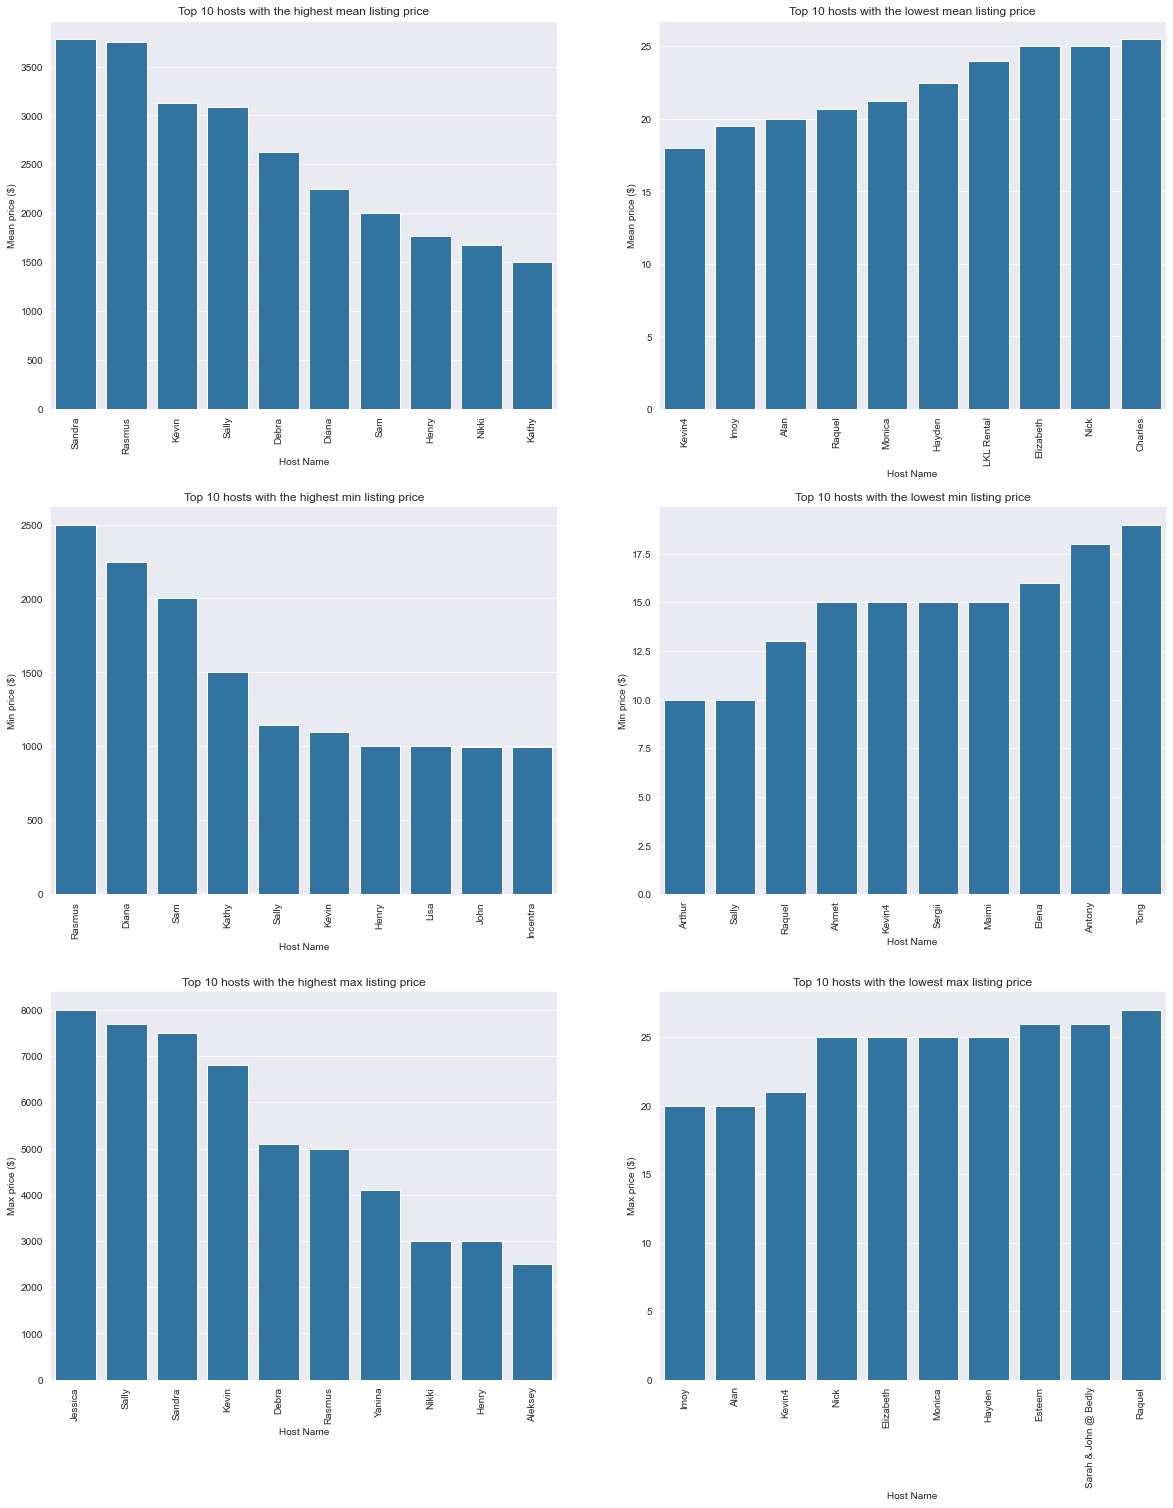

In [31]:
plt.figure(figsize=(20,25))
plt.subplots_adjust(hspace=0.25)

# high and low mean prices
plt.subplot(3,2,1)
top_price('price_mean',10)
labels('Top 10 hosts with the highest mean listing price', 'Host Name', 'Mean price ($)')
plt.xticks(rotation=90)

plt.subplot(3,2,2)
lowest_price('price_mean',10)
labels('Top 10 hosts with the lowest mean listing price', 'Host Name', 'Mean price ($)')
plt.xticks(rotation=90)

# high and low min prices
plt.subplot(3,2,3)
top_price('price_min',10)
labels('Top 10 hosts with the highest min listing price', 'Host Name', 'Min price ($)')
plt.xticks(rotation=90)

plt.subplot(3,2,4)
lowest_price('price_min',10)
labels('Top 10 hosts with the lowest min listing price', 'Host Name', 'Min price ($)')
plt.xticks(rotation=90)

# high and low max prices
plt.subplot(3,2,5)
top_price('price_max',10)
labels('Top 10 hosts with the highest max listing price', 'Host Name', 'Max price ($)')
plt.xticks(rotation=90)

plt.subplot(3,2,6)
lowest_price('price_max',10)
labels('Top 10 hosts with the lowest max listing price', 'Host Name', 'Max price ($)')
plt.xticks(rotation=90);

The subplots above show the top and bottom 10 for each of the following categories: price_mean, price_min and price_max. Only hosts that have multiple listings are included and only listings that are greater than \\$0 are included. 

When comparing the top 10 hosts by mean listing price, there are two hosts that have a mean listing price of above \\$3500. This shows that there are hosts with multiple listings in the luxury category. We can compare the top 10 hosts with the highest max listing price and see that some of the hosts appear in both plots. For example, Sandra has a listing of around \\$7500 and has a mean price of \\$3750.

In [32]:
# View listings from host Sandra the highest mean price.
airbnb[(airbnb['host_name']=='Sandra') & 
       (airbnb['host_id']==262534951)][['host_id','host_name','price','calculated_host_listings_count']]

,host_id,host_name,price,calculated_host_listings_count
45554,262534951,Sandra,60,2
45666,262534951,Sandra,7500,2


Above shows that Sandra has two listings, one at \\$60 and one at \\$7500. Therefore, in this case, hosts that have high priced listings can also have cheaper priced listings as well.

When comparing the highest minimum listing price for hosts with multiple listings, Rasmus has the highest minimum listing at \\$2500. As shown below, Rasmus has two listings, one at \\$2500 and one at \\$5000 showing that he hosts luxury stays only.

In [33]:
# display Rasmus' listings
airbnb[(airbnb['host_name']=='Rasmus')&
       (airbnb['host_id']==172611460)][['host_id','host_name','price','calculated_host_listings_count']]

,host_id,host_name,price,calculated_host_listings_count
32041,172611460,Rasmus,2500,2
38000,172611460,Rasmus,5000,2


When comparing the cheapest mean prices, there are hosts that have listings with a mean price less than \\$25, therefore, there are options for cheap stays in New York. When looking at the lowest minimum prices for hosts with multiple listings, there are also options less than \\$20. 

Some hosts only have cheap listings. By looking at the top 10 hosts with the lowest maximum listing prices, the max listing for Imoy and Alan is \\$20 whilst there are several other hosts with max prices of around \\$25 too.

In [34]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [35]:
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

### What is the distribution of room types when grouped by neighbourhood group?

In [36]:
neighbourhood_room = airbnb.copy()

neighbourhood_room['room_count'] = neighbourhood_room.groupby('neighbourhood_group')['room_type'].transform('count')
neighbourhood_room.room_count.unique()

array([20104, 21661,  5666,   373,  1091])

In [37]:
tester = airbnb.groupby(['neighbourhood_group','room_type']).count().reset_index()
tester['total'] = tester.groupby('neighbourhood_group')['id'].transform('sum')
tester['prop'] = tester['id']/tester['total']
tester

,neighbourhood_group,room_type,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,total,prop
0,Bronx,Entire home/apt,379,379,379,378,379,379,379,379,379,379,309,309,379,379,1091,0.347388
1,Bronx,Private room,652,652,652,652,652,652,652,652,652,652,524,524,652,652,1091,0.597617
2,Bronx,Shared room,60,59,60,60,60,60,60,60,60,60,43,43,60,60,1091,0.054995
3,Brooklyn,Entire home/apt,9559,9558,9559,9554,9559,9559,9559,9559,9559,9559,8164,8164,9559,9559,20104,0.475478
4,Brooklyn,Private room,10132,10127,10132,10128,10132,10132,10132,10132,10132,10132,7993,7993,10132,10132,20104,0.503979
5,Brooklyn,Shared room,413,413,413,413,413,413,413,413,413,413,290,290,413,413,20104,0.020543
6,Manhattan,Entire home/apt,13199,13193,13199,13196,13199,13199,13199,13199,13199,13199,9967,9967,13199,13199,21661,0.609344
7,Manhattan,Private room,7982,7979,7982,7976,7982,7982,7982,7982,7982,7982,6309,6309,7982,7982,21661,0.368496
8,Manhattan,Shared room,480,480,480,480,480,480,480,480,480,480,356,356,480,480,21661,0.022160
9,Queens,Entire home/apt,2096,2096,2096,2096,2096,2096,2096,2096,2096,2096,1742,1742,2096,2096,5666,0.369926


/Users/vincentkhor/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


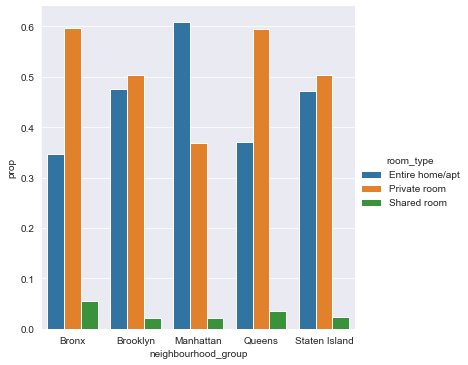

In [45]:
sns.cat
plot(data=tester,x='neighbourhood_group',y='prop',hue='room_type',kind='bar');

# https://stackoverflow.com/questions/38807895/seaborn-multiple-barplots/38808042 see here for method..

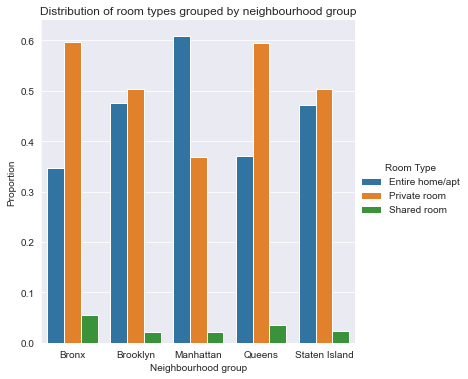

In [62]:
g = sns.catplot(data=tester,x='neighbourhood_group',y='prop',hue='room_type',kind='bar')
labels('Distribution of room types grouped by neighbourhood group', 'Neighbourhood group','Proportion')
g._legend.set_title('Room Type');

### What is the relationship between price and number_of_reviews?

In [39]:
#remove?
airbnb.sort_values('number_of_reviews',ascending=False)[['price','number_of_reviews','last_review','reviews_per_month']]


,price,number_of_reviews,last_review,reviews_per_month
11759,47,629,2019-07-05,14.58
2031,49,607,2019-06-21,7.75
2030,49,597,2019-06-23,7.72
2015,49,594,2019-06-15,7.57
13495,47,576,2019-06-27,13.40
...,...,...,...,...
12724,250,0,NaN,NaN
12721,175,0,NaN,NaN
12717,45,0,NaN,NaN
12716,100,0,NaN,NaN


### heatmap of average price


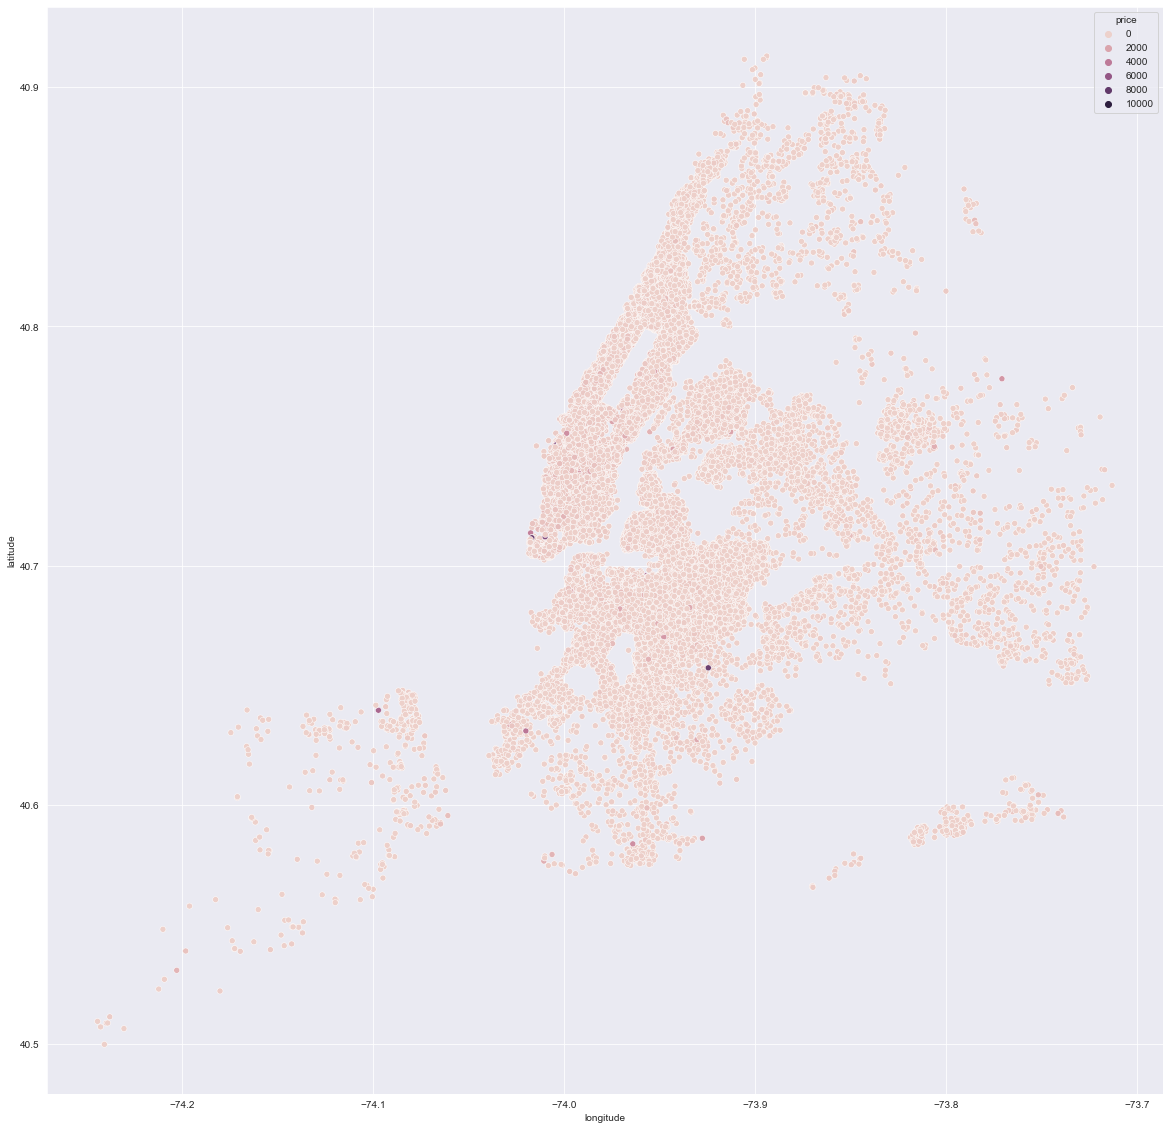

In [40]:
plt.figure(figsize=(20,20))
sns.scatterplot(data=airbnb,x='longitude',y='latitude',hue='price');

In [41]:
test = airbnb.pivot('latitude','longitude','price')
sns.heatmap(test)

ValueError: Index contains duplicate entries, cannot reshape

ideas:
- do certain areas have higher average rental prices?
- which hosts are the busiest?
- How does the room type affect price?
- heatmap of average price?
- what is the importance of number of reviews on rental price?
- who has the most listings?
- regression model to predict price?
- reviews per month vs price? other factors
- facet grid, listing type by neighbourhood

In [ ]:
test = np.arange(0,5,100)

In [ ]:
test